# **Manipulação do Solar Flare Dataset** ☀️

### **Importando Bibliotecas** 📚

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2

### **Incluindo Conjunto de Dados para Visualização** 👁️‍🗨️

In [15]:
# Definindo os nomes dos parâmetros do dataset
headers = ["class", "largestSpot", "spotDistribution", "activity", "evolution", "previousActivity", "complex",
           "complexOnPath", "area", "largestSpotArea", "c-class", "m-class", "x-class", "sum-class"]

# Importando o Dataset
df = pd.read_csv('/content/SolarFlare.csv', header=None, names=headers)

# Transformando os dados no formato de strings para ponto flutuante
ord_enc = OrdinalEncoder()
df["class"] = ord_enc.fit_transform(df[["class"]])
df["largestSpot"] = ord_enc.fit_transform(df[["largestSpot"]])
df["spotDistribution"] = ord_enc.fit_transform(df[["spotDistribution"]])

# Definindo sum-class como a soma das classes c-class, m-class e x-class
df['sum-class'] = df['c-class'] + df['m-class'] + df['x-class']
# Limitando os valores da classe sum-class para 0 (não houve explosão solar) e 1 (houve explosão solar)
df['sum-class'] = df['sum-class'].astype(bool).astype(int)
result = df.copy()

# Mostrando os dados
df.describe()

,class,largestSpot,spotDistribution,activity,evolution,previousActivity,complex,complexOnPath,area,largestSpotArea,c-class,m-class,x-class,sum-class
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.000000
mean,2.627580,2.958724,2.035647,1.153846,2.401501,1.059099,1.404315,1.875235,1.025328,1.0,0.300188,0.046904,0.005629,0.188555
std,1.844965,1.703403,0.806456,0.360971,0.620584,0.320324,0.490989,0.330608,0.157194,0.0,0.835784,0.302811,0.086487,0.391339
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,3.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000,1.000000


#### **Checando a Existência de Valores Nulos no Conjunto**  ❌

In [16]:
# Mostrando todos parâmetros e informações sobre as instâncias
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             1066 non-null   float64
 1   largestSpot       1066 non-null   float64
 2   spotDistribution  1066 non-null   float64
 3   activity          1066 non-null   int64  
 4   evolution         1066 non-null   int64  
 5   previousActivity  1066 non-null   int64  
 6   complex           1066 non-null   int64  
 7   complexOnPath     1066 non-null   int64  
 8   area              1066 non-null   int64  
 9   largestSpotArea   1066 non-null   int64  
 10  c-class           1066 non-null   int64  
 11  m-class           1066 non-null   int64  
 12  x-class           1066 non-null   int64  
 13  sum-class         1066 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 116.7 KB


Todas as 1165 instâncias dos parâmetros não são nulas, mostrando que os dados já passaram pelo processo de limpeza.

### **Escolha de Parâmetros** ❎

A filtragem de parâmetros foi feita através de pesquisas a respeito do tópico de explosões solares, a fim de que pudéssemos fazer demonstrações gráficas dos parâmetros mais relevantes para o nosso modelo, sendo selecionados:

*   Class (representado por um código A,B,C,D,E,F,H)
*   Largest Spot (dividido em X, R, S, A, H e K)
*   Previous Activity (1 = não tão grande quanto um M1, 2 = é um M1, 3 = mais ativo que um M1, em que um M1 é uma classe de explosão solar moderadamente intensa na faixa de raios-X )
*   Complex On Path (região tornou-se historicamente complexa nessa
passagem atual pelo disco solar? 1 = Sim, 2 = Não)
*   Spot Distribution (dividido em X, O, I e C)
*   Area (1 = pequena, 2 = grande)



### **Plotando Soma de Classes por Parâmetro** 📊

Faremos plotagem de gráficos da soma das classes 'x', 'm' e 'c' por cada um dos parâmetros selecionados.

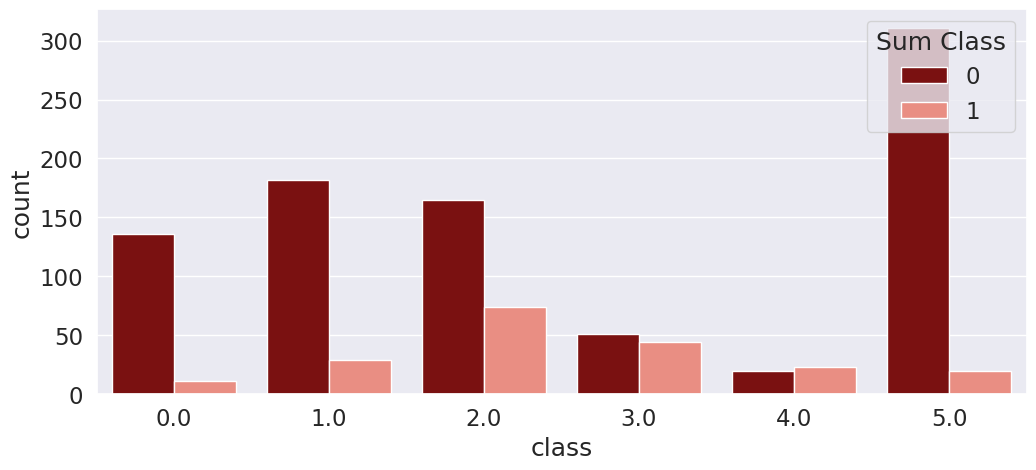

In [17]:
# Plotando por classe

plt.figure(figsize=(12, 5))

cores_escolhidas = ["darkred", "salmon"]

sns.countplot(x="class", data=df, hue="sum-class", palette=cores_escolhidas)

plt.legend(title="Sum Class", loc="upper right")

plt.show()

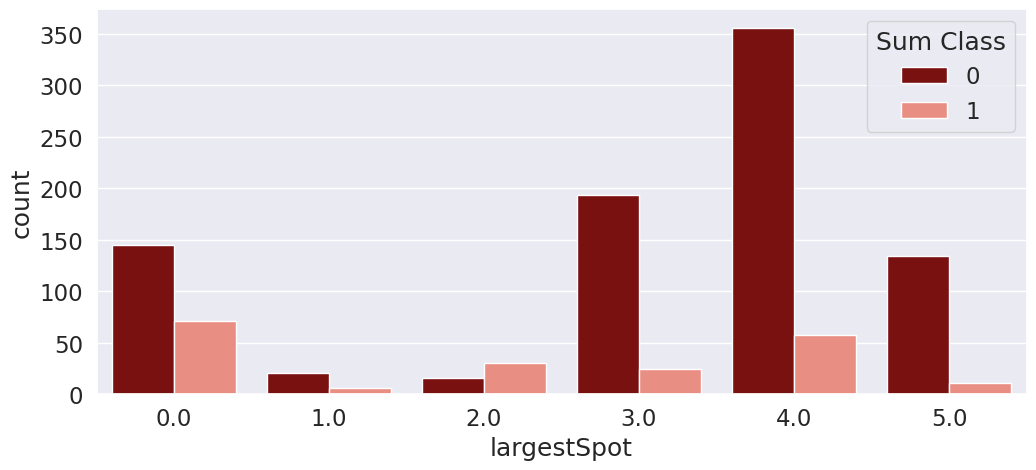

In [18]:
# Plotando por largestSpot

plt.figure(figsize=(12, 5))

cores_escolhidas = ["darkred", "salmon"]

sns.countplot(x="largestSpot", data=df, hue="sum-class", palette=cores_escolhidas)

plt.legend(title="Sum Class", loc="upper right")

plt.show()

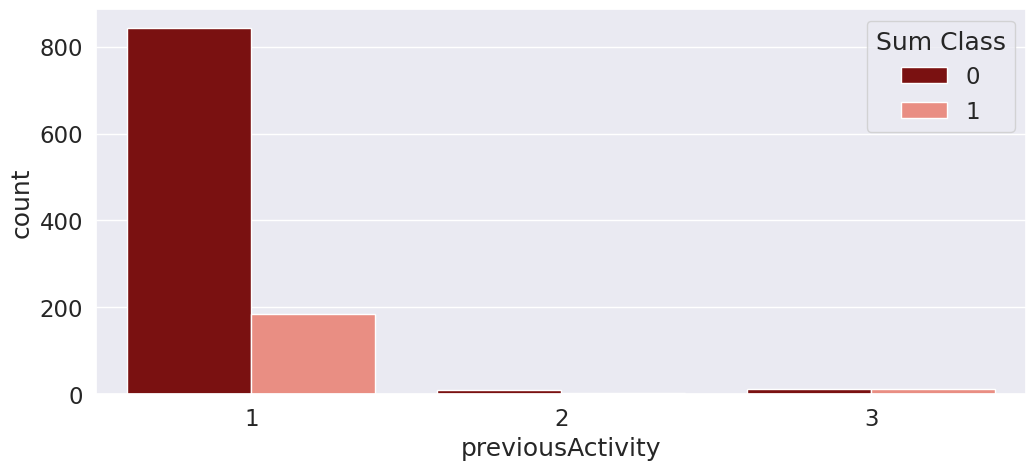

In [19]:
# Plotando por Previous Activity

plt.figure(figsize=(12, 5))

cores_escolhidas = ["darkred", "salmon"]

sns.countplot(x="previousActivity", data=df, hue="sum-class", palette=cores_escolhidas)

plt.legend(title="Sum Class", loc="upper right")

plt.show()

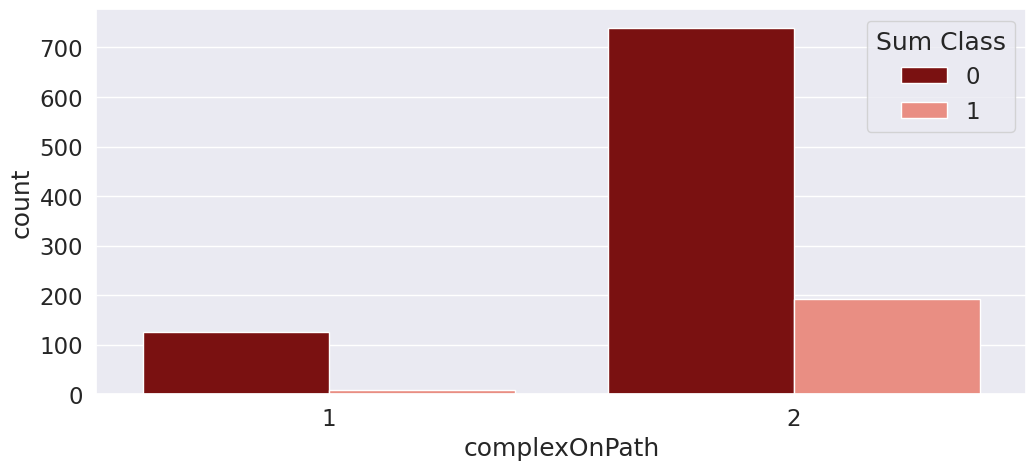

In [20]:
# Plotando por Complex on Path

plt.figure(figsize=(12, 5))

cores_escolhidas = ["darkred", "salmon"]

sns.countplot(x="complexOnPath", data=df, hue="sum-class", palette=cores_escolhidas)

plt.legend(title="Sum Class", loc="upper right")

plt.show()

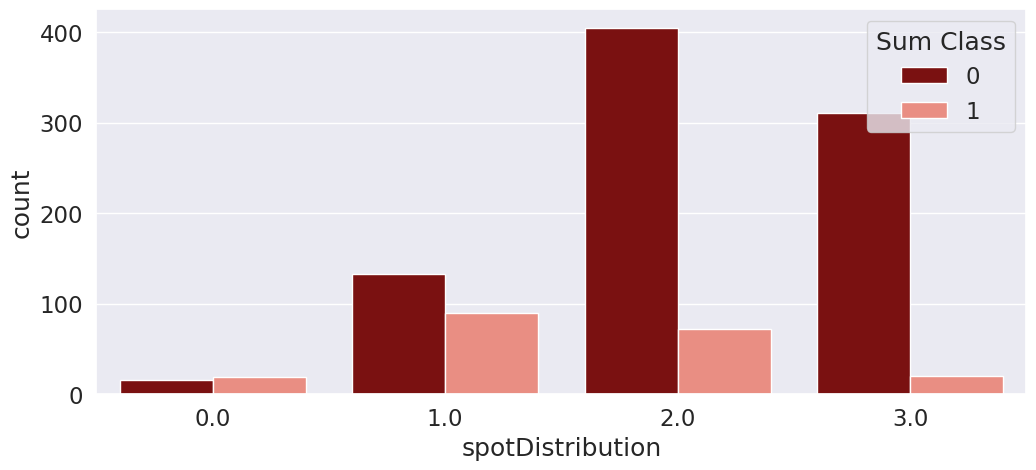

In [21]:
# Plotando por Spot Distribution

plt.figure(figsize=(12, 5))

cores_escolhidas = ["darkred", "salmon"]

sns.countplot(x="spotDistribution", data=df, hue="sum-class", palette=cores_escolhidas)

plt.legend(title="Sum Class", loc="upper right")

plt.show()

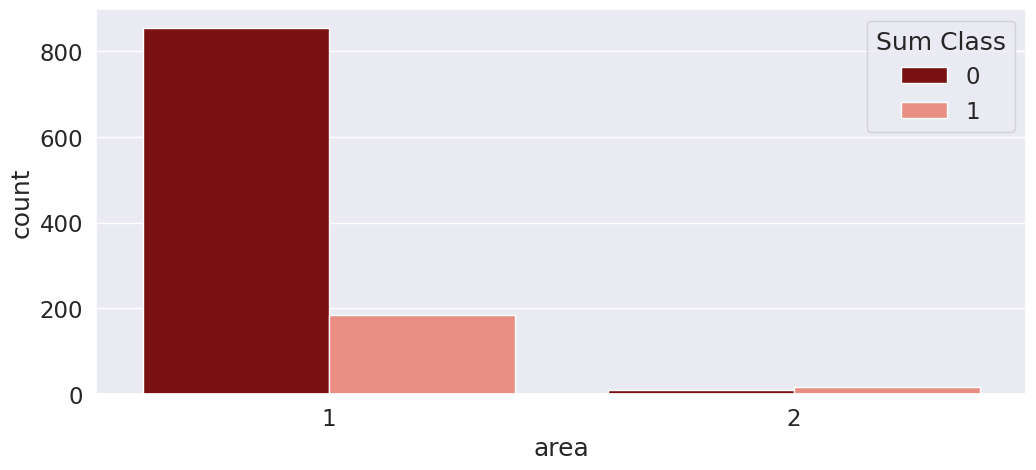

In [22]:
# Plotando por Area

plt.figure(figsize=(12, 5))

cores_escolhidas = ["darkred", "salmon"]

sns.countplot(x="area", data=df, hue="sum-class", palette=cores_escolhidas)

plt.legend(title="Sum Class", loc="upper right")

plt.show()

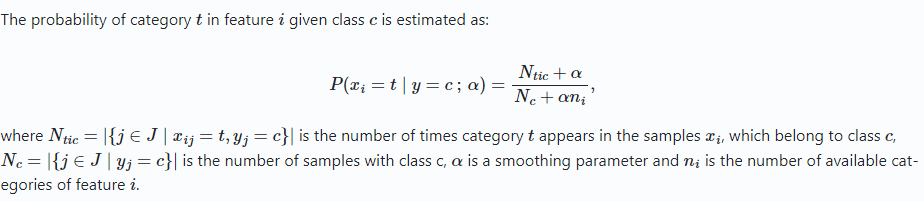


### **Declarando o Valor Target e o Vetor com os Parâmetros Selecionados**

In [23]:
# Parâmetros Selecionados
X = df.drop("sum-class", axis = 1)
X = X[["class", "largestSpot","previousActivity","complexOnPath","spotDistribution","area"]]

# Valor Target
y = df["sum-class"]

### **Separando em Sets de Treino e Sets de Teste para Aplicação do Classificador Naive Bayes** 📔

In [24]:
# Incluindo as bibliotecas necessárias para o modelo de Bayes
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [25]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
# OBS: Test_size é usado para separar uma certa quantidade do conjunto de dados para realizar os teste, a quantidade restante é usada no treinamento do modelo. Por isso, não se recomenda usar valores muito maiores que 0.3

# Treinando o modelo Categorical Native Bayes
gnb = CategoricalNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(f"Accuracy: {round(accuracy*100, 2)}%")

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       257
           1       0.47      0.49      0.48        63

    accuracy                           0.79       320
   macro avg       0.67      0.68      0.67       320
weighted avg       0.79      0.79      0.79       320

Accuracy: 79.06%


## **Resultados** 📒

<Axes: >

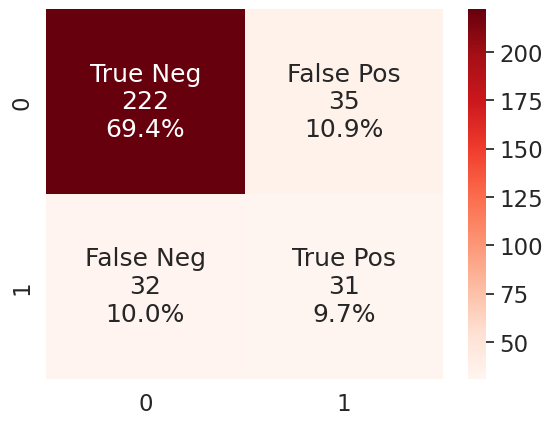

In [26]:
confusion_mat = confusion_matrix(y_test, y_pred)

# Definindo o nome de cada célula
classification = ['True Neg','False Pos','False Neg','True Pos']

# Mostrando o número de classificaçãoes
qtd = ["{0:0.0f}".format(value) for value in confusion_mat.flatten()]

# Definindo a porcentagem da célula em relação ao número total de classificações
percentages = ["{0:.1%}".format(value) for value in confusion_mat.flatten() / np.sum(confusion_mat)]

# Definindo as labels
labels = [f"{a}\n{b}\n{c}" for a, b, c in zip(classification, qtd, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plotando a matriz de confusão
sns.set(font_scale = 1.5)
sns.heatmap(confusion_mat, annot=labels, fmt='', cmap='Reds')